In [1]:
from h5py import File
from numpy import array
import biosignalsnotebooks as bsnb
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from numpy import max, cumsum, concatenate, zeros, linspace, sqrt, average, power, absolute, mean, std, max, array, diff, where
from scipy.integrate import cumtrapz
from scipy.signal import welch
import math
import numpy as np
from numpy import max, min, average, std, sum, sqrt, where, argmax, absolute, array, random, zeros

In [2]:
File_Name="lineabasal1.h5"

h5_object=File(File_Name)

In [3]:
data, header=bsnb.load("lineabasal1.h5",get_header=True)

In [4]:
signal=data["CH4"]
time=bsnb.generate_time(signal,header["sampling rate"])

In [5]:
bokeh_figure=figure(x_axis_label="Time(s)", y_axis_label="Raw Data")

In [6]:
bokeh_figure.line(time,signal,legend_label="Datos Originales")

GlyphRenderer(id='1037', ...)

In [7]:
show(bokeh_figure)

FILTRADO DE LA SEÑAL

In [8]:
sr=1000
t_start= 0
sample_start=t_start*sr

t_end=30
sample_end=t_end*sr

In [9]:
#Frecuencia de corte
low_cutoff_wide=3 #Lower cutoff frequency for bandpass filter (Hz)
high_cuttoff_wide=30 #Upper cutoff frequency for bandpass filter (Hz)

In [22]:
filtered_signal=bsnb.bandpass(signal,low_cutoff_wide,high_cuttoff_wide, order=2, fs=sr)


In [28]:
from bokeh.models import Range1d
bokeh_figure=figure(x_axis_label="Time(s)", y_axis_label="Raw Data")
bokeh_figure.y_range=Range1d(-200, 200)
bokeh_figure.line(time,filtered_signal,legend_label="Datos Filtrados")
show(bokeh_figure)

DETECCIÓN DE ERP

In [31]:
#signal_acoustic=data["CH1"]
signal_eeg=data["CH4"]
device = header["device"] 
resolution = header["resolution"][0]
signal_uv=bsnb.raw_to_phy("EEG",device,signal_eeg,resolution,option="uV")
signal_ac=signal_eeg-mean(signal_eeg)
#Generando los ejes de tiempo:
time_eeg= bsnb.generate_time(signal_uv)
time_a= bsnb.generate_time(signal_eeg)

time_a_down= time_a[::10]
signal_ac_down=signal_ac[::10]

#Estimulo sonoro:
bsnb.plot([time_a_down],[signal_ac_down], y_axis_label="Value RAW", legend="Acoustic Simuli RAW")

EXTRACCION DE LA BANDA ALFA

In [34]:
signal_uv = bsnb.raw_to_phy("EEG","biosignalsplux",signal_eeg, resolution, "uV")
time_uv = bsnb.generate_time(signal_uv,sr)

In [36]:
freq_low = 8 #lower limit for alpha band
freq_high = 12 #Upper limit for alpha band 

In [42]:
filtered_signal_eeg=bsnb.bandpass(signal_eeg,low_cutoff_wide,high_cuttoff_wide, order=2, fs=1000)
bsnb.plot([filtered_signal_eeg], y_axis_label="Value RAW", legend="Acoustic Simuli RAW")

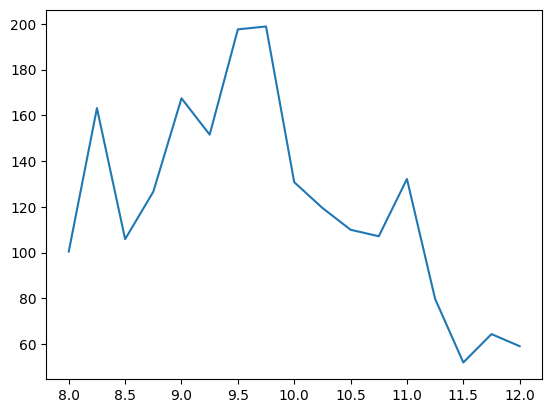

In [46]:
import scipy.signal
#Time Windows for Welchs method 
sr=1000
win = 4 * sr # 4 seconds time windows.

axis_x, axis_y = scipy.signal.welch(filtered_signal_eeg, sr, nperseg=win)

Senal_reposo = np.logical_and(axis_x >= freq_low, axis_x<= freq_high)
plt.plot(axis_x[Senal_reposo], axis_y[Senal_reposo])